## Readmission Dataset: Statistical Analysis ¶
    I will be performing some statistical analyses on the Readmission dataset. I will follow the figure below as a guide  to answer below itemised questions.
- Does Correlations exist among the numerical variables?
- Does Differences exist between the categorical variables?
- Does relationship exist between the categorical and numerical variables?
    
    Variables could be categorical or numerical. There are different statistical and visualization techniques of investigation for each type of variable.
    Among the Statistical test I'll be using are as follow:
 - t-test
 - Anova
 - Linear regression
 
  Below inverted tree begins with node Type of Request (RQ)

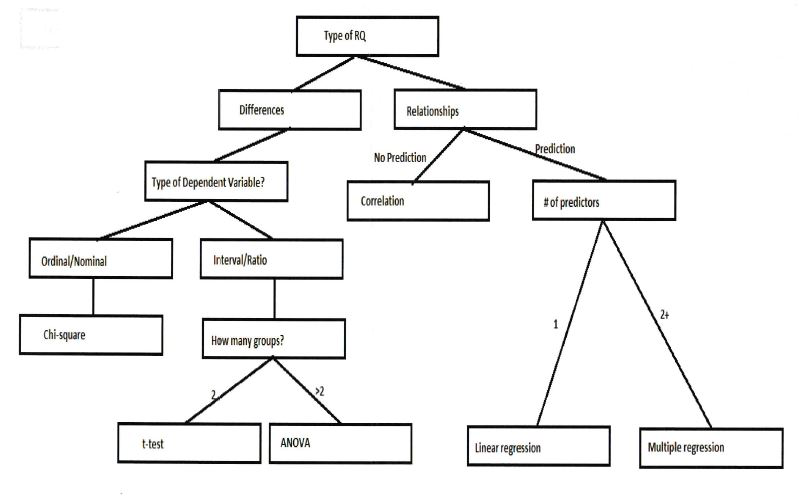

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
from PIL import Image
path="data_analysis.jpg"
display(Image.open(path))

In [4]:
# Loading Dataset
readmission=pd.read_csv("diabetic_data.csv")

In [12]:
#display top 5
readmission.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
#number of columns
len(readmission.columns)

50

In [134]:
print("column-wise distribution of null values")
print(readmission.replace('?',np.nan).isnull().sum())

column-wise distribution of null values
race                         2273
gender                          0
age                             0
weight                      98569
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglita

In [144]:
print("dataframe-wise distribution of null values")
print(readmission.replace('?',np.nan).isnull().values.sum())

dataframe-wise distribution of null values
192849


Not all the columns will be useful for analysis. Below are the list of columns which are used for identifications purpose only

In [19]:
readmission_excluded_cols = [s for s in readmission.columns if "_id" in s]
readmission_excluded_cols

['encounter_id',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id']

Leaving us with below useful columns

In [41]:
readmission_col = [s for s in readmission.columns if "_id" not in s and "nbr" not in s]
readmission_col

['race',
 'gender',
 'age',
 'weight',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [42]:
#We need to filter datafame to use only useful columns
readmission=readmission[readmission_col]

Let's examine all numerical columns of the dataframe

In [44]:
readmission.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


With the result of the table above, mean standard deviation and percentiles show many outliers for all columns except "time_in_hospital" and "num_procedures" columns.
Since numerical columns are not many, we can visualize the above descriptions using seaborn boxplot.

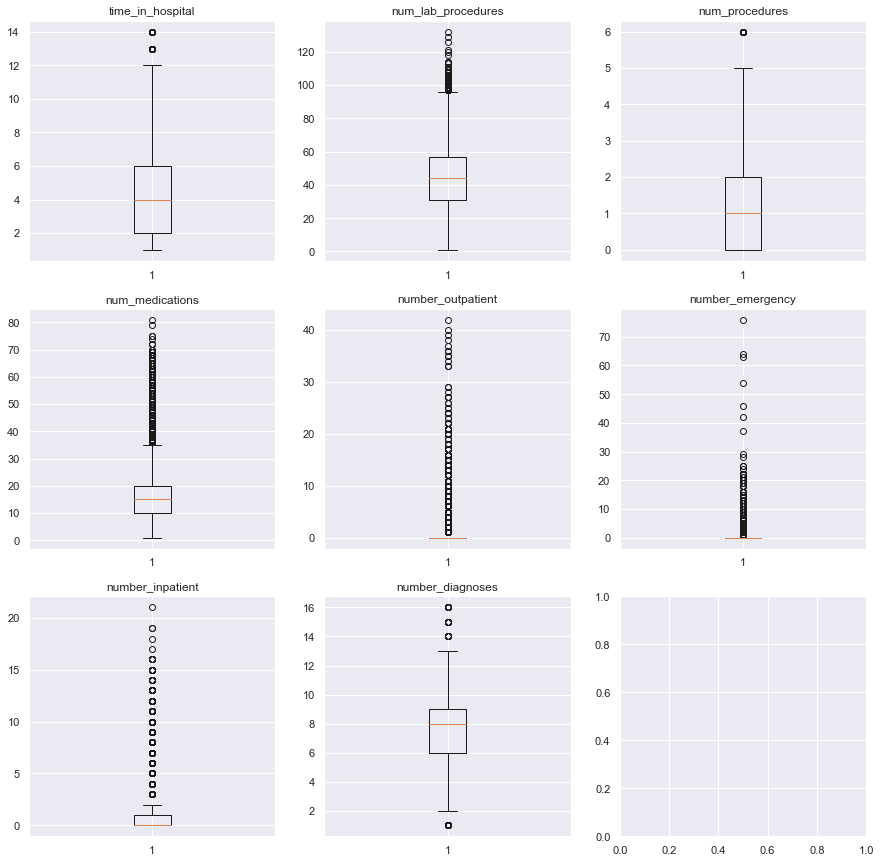

In [67]:
Numerical_cols=readmission.describe().columns
row,col=3,3
f,axarr=plt.subplots(row,col,figsize=(15,15))
u=0
for i in range(row):
    for j in range(col):
        if u<len(Numerical_cols):
            axarr[i,j].boxplot(x=readmission[Numerical_cols[u]] )
            axarr[i,j].set_title(Numerical_cols[u])
            u+=1
            #sns.despine(offset=10, trim=True)

Let's plot the value distributions in each of the numerical columns

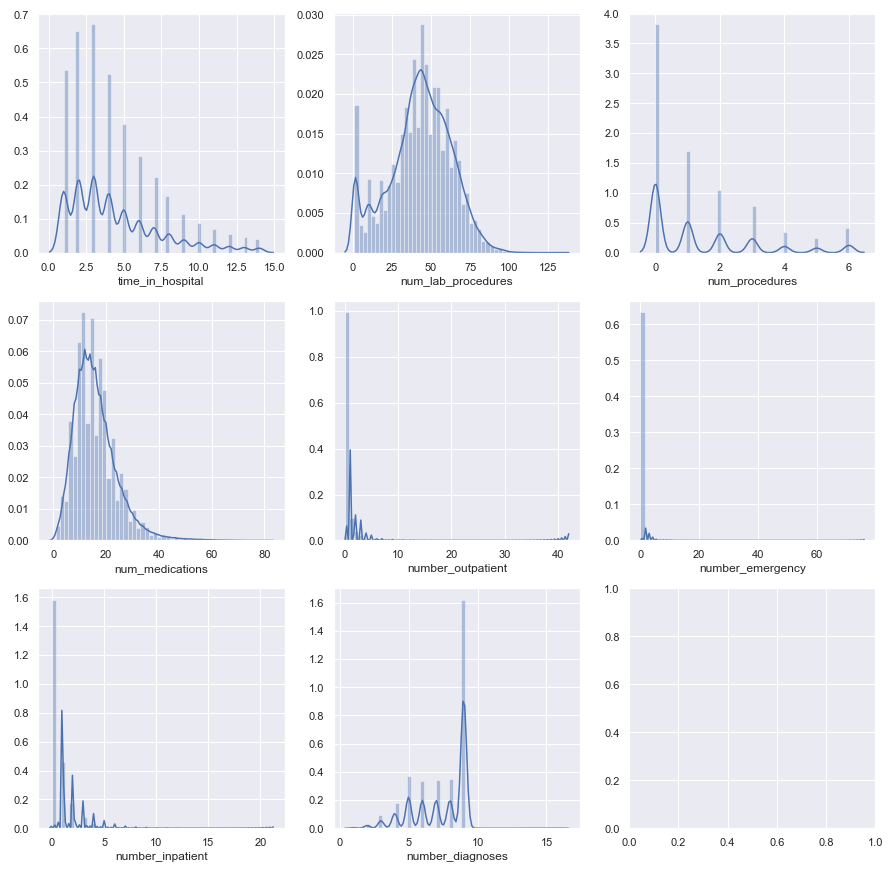

In [116]:
Numerical_cols=readmission.describe().columns
row,col=3,3
f,axarr=plt.subplots(row,col,figsize=(15,15))
u=0
for i in range(row):
    for j in range(col):
        if u<len(Numerical_cols):
            sns.distplot(readmission[Numerical_cols[u]], ax=axarr[i,j])
            u+=1

Let's analyze of find identify all the column outliers, we'll exclude them and re-plot the distribution graph to see how the graphs look  

In [113]:
from scipy import stats
readmission1=readmission[Numerical_cols][(np.abs(stats.zscore(readmission[Numerical_cols])) < 3).all(axis=1)]

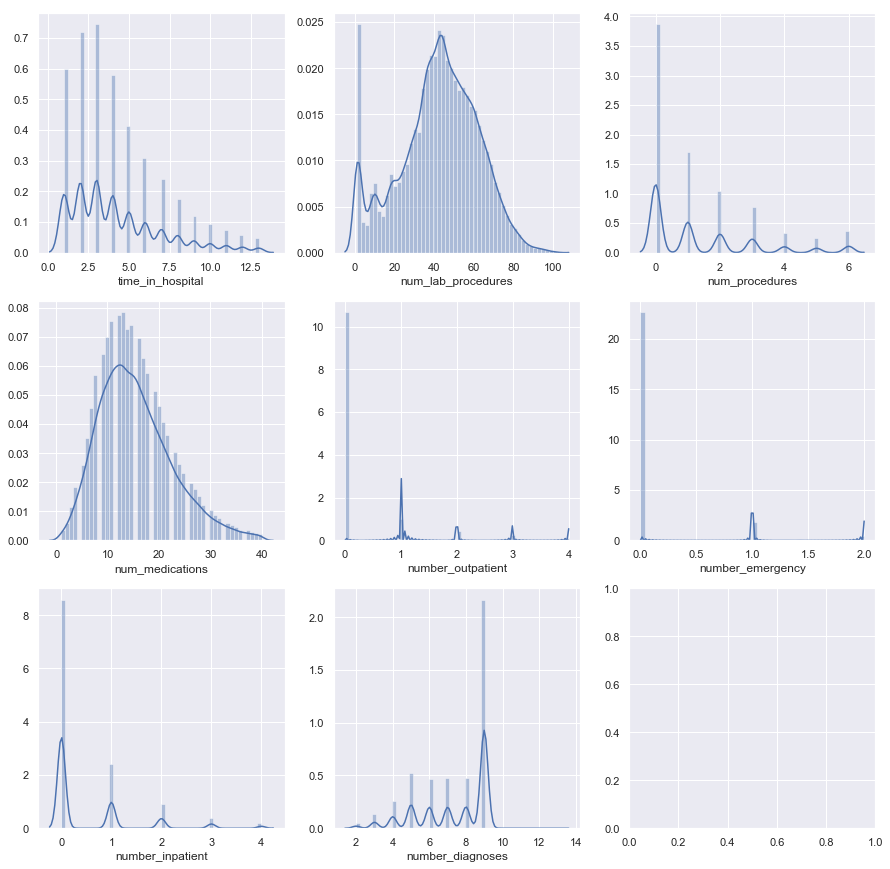

In [115]:
Numerical_cols=readmission.describe().columns
row,col=3,3
f,axarr=plt.subplots(row,col,figsize=(15,15))
u=0
for i in range(row):
    for j in range(col):
        if u<len(Numerical_cols):
            sns.distplot(readmission1[Numerical_cols[u]], ax=axarr[i,j])
            u+=1

Correlation: Next i will be finding the relationship between all numerical columns

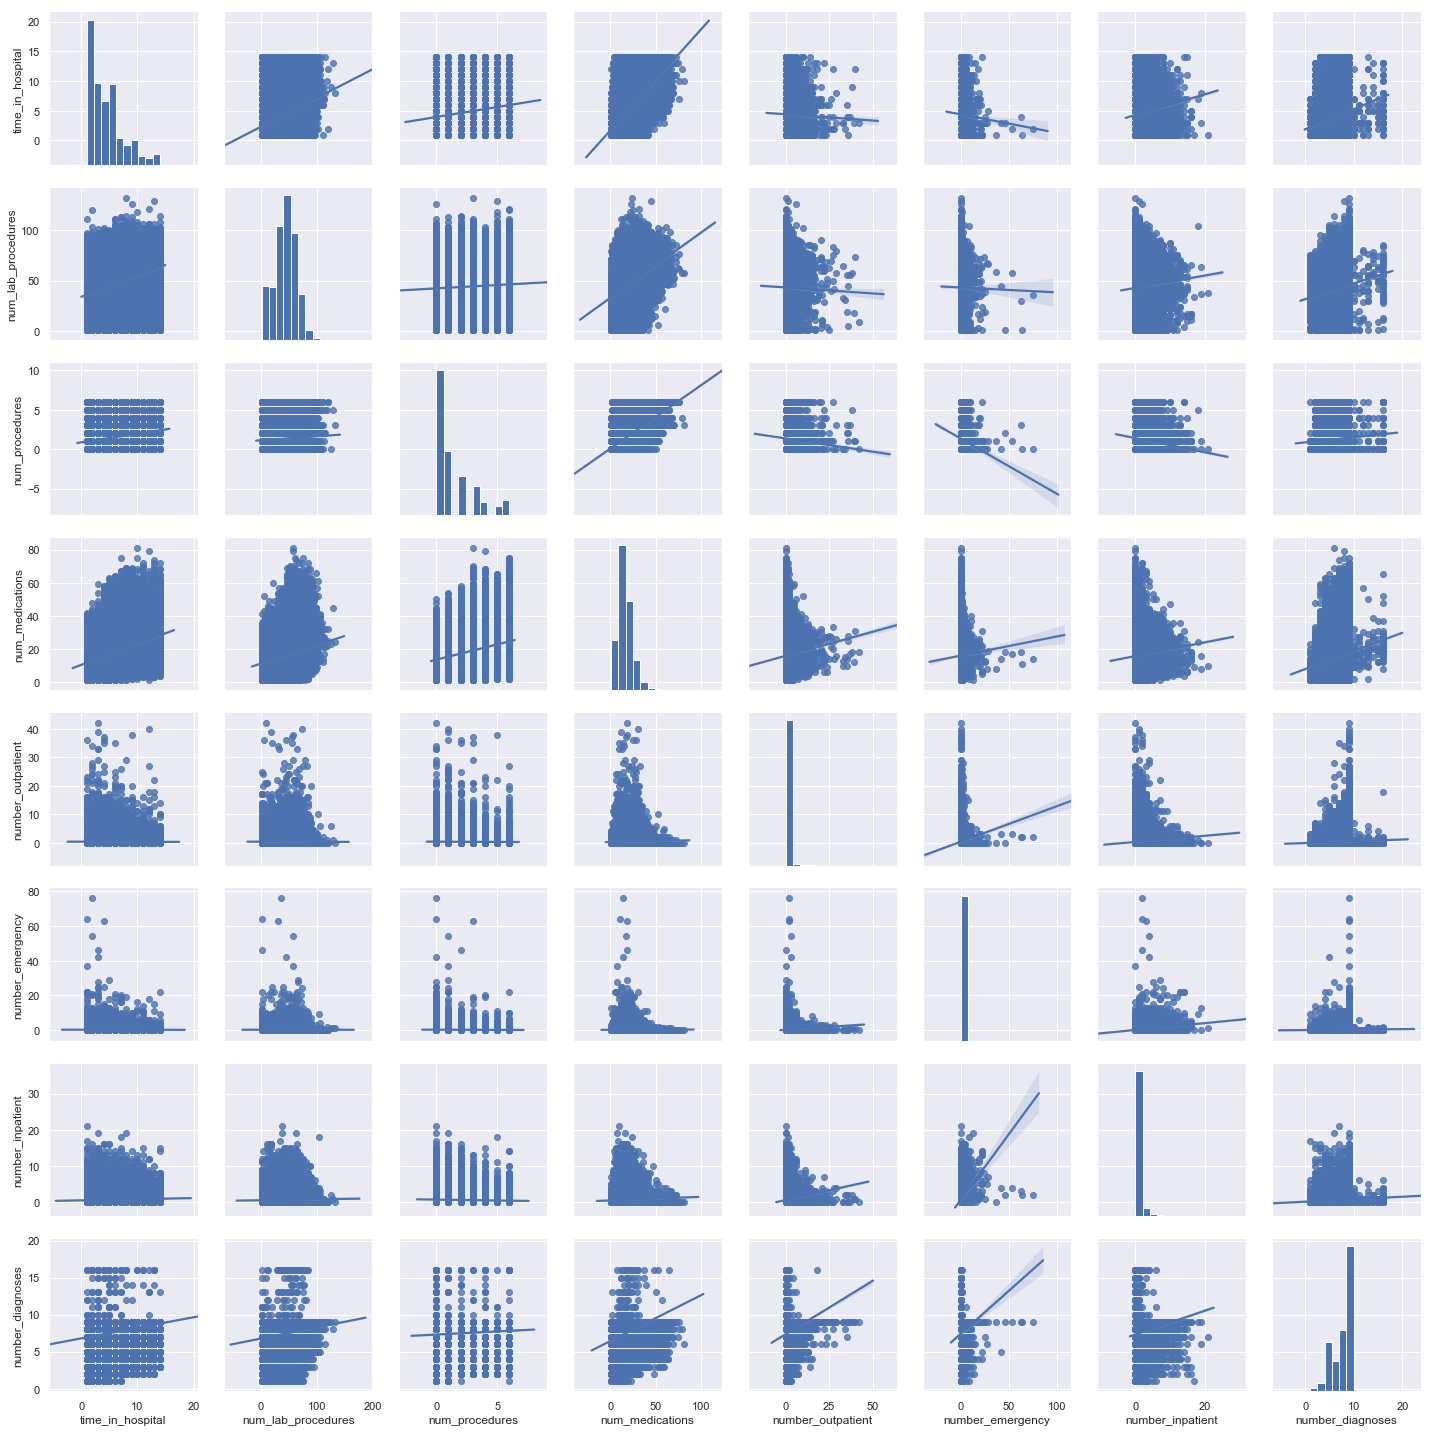

In [122]:
sns.pairplot(data=readmission[Numerical_cols],kind='reg')

The above graphs indicate little or no relationship between all the numerical variables. We will confirmed these by looking at correlations matrix

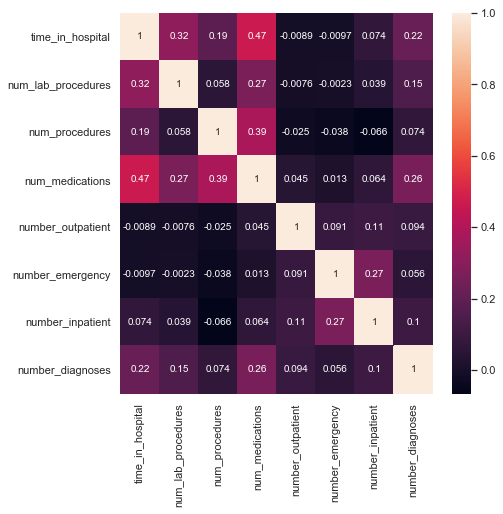

In [166]:
f,axarr=plt.subplots(figsize=(7,7))
# calculate the correlation matrix
corr = readmission[Numerical_cols].corr()
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns,ax=axarr)

Above correlations graph just confirmed that no strong correlations exist among the numerical variables but i can observe some
degree of correlation between num_lab_procedures and time_in_hospital, num_medications and time_in_hospital with 0.47 and 0.32 respectively.